📝 Project: Regression on House Rent Prediction
In this project, we work with a real-world dataset containing various features related to residential rental properties. The goal is to build a complete machine learning pipeline—from data cleaning and feature engineering to model development and evaluation—to predict the rental cost of a house based on its characteristics.

🎯 Objective
The primary objective is to build and evaluate regression models that can accurately predict the monthly house rent. These predictions are valuable for property listing platforms, real estate agents, and potential tenants to understand rental trends and make informed decisions.

🤖 Models Evaluated

MultiLinear Regression

Polynomial Regression

Support Vector Regression (SVR)

Random Forest Regressor

Tuned Random Forest Regressor

XGBoost Regressor

Evaluation Metrics
To assess model performance, the following regression metrics are used:

- MAE (Mean Absolute Error)

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

These metrics help evaluate the accuracy and consistency of the models in predicting continuous values.


✅ Outcome
By comparing these models, we aim to:

- Identify the most suitable algorithm for house rent prediction

- Understand the influence of various features such as location, furnishing status, and size on rent

- Provide actionable insights to improve rent estimation tools and enhance decision-making in the real estate domain



In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S8/Reression/archive/House_Rent_Dataset.csv")

In [3]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [9]:
data['Posted On'] = pd.to_datetime(data['Posted On'], format='%Y-%m-%d', errors='coerce')
data['year'] = data['Posted On'].dt.year
data['month'] = data['Posted On'].dt.month
data['day'] = data['Posted On'].dt.day
data['day_of_week'] = data['Posted On'].dt.dayofweek   # Monday=0, Sunday=6
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)


In [12]:
data=data.drop('Posted On',axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Floor'] = le.fit_transform(data['Floor'])
data['Area Type'] = le.fit_transform(data['Area Type'])
data['Area Locality'] = le.fit_transform(data['Area Locality'])
data['City'] = le.fit_transform(data['City'])
data['Furnishing Status'] = le.fit_transform(data['Furnishing Status'])
data['Tenant Preferred'] = le.fit_transform(data['Tenant Preferred'])
data['Point of Contact'] = le.fit_transform(data['Point of Contact'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   BHK                4746 non-null   int64
 1   Rent               4746 non-null   int64
 2   Size               4746 non-null   int64
 3   Floor              4746 non-null   int64
 4   Area Type          4746 non-null   int64
 5   Area Locality      4746 non-null   int64
 6   City               4746 non-null   int64
 7   Furnishing Status  4746 non-null   int64
 8   Tenant Preferred   4746 non-null   int64
 9   Bathroom           4746 non-null   int64
 10  Point of Contact   4746 non-null   int64
 11  year               4746 non-null   int32
 12  month              4746 non-null   int32
 13  day                4746 non-null   int32
 14  day_of_week        4746 non-null   int32
 15  is_weekend         4746 non-null   int64
dtypes: int32(4), int64(12)
memory usage: 519.2 KB


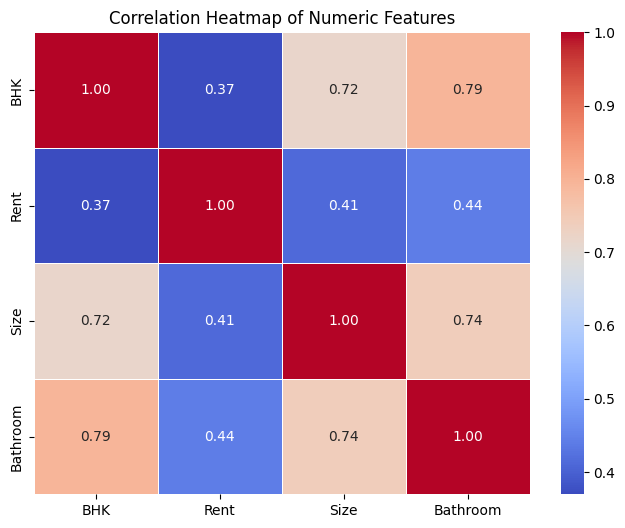

In [11]:
numeric = data.select_dtypes(include=['int64','float64'])
corr = numeric.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

1. Strong Positive Correlation: The features "Size" and "Bathroom" have a strong positive correlation of 0.74, indicating that as the size of a house increases, the number of bathrooms also tends to increase. Similarly, "BHK" (Bedroom-Hall-Kitchen) and "Bathroom" have a strong positive correlation of 0.79, suggesting that houses with more bedrooms tend to have more bathrooms.

2. Moderate Positive Correlation: The feature "Rent" has a moderate positive correlation with "Size" (0.41) and "Bathroom" (0.44), indicating that larger houses with more bathrooms tend to have higher rents. Additionally, "BHK" has a moderate positive correlation with "Rent" (0.37), suggesting that houses with more bedrooms tend to have higher rents.

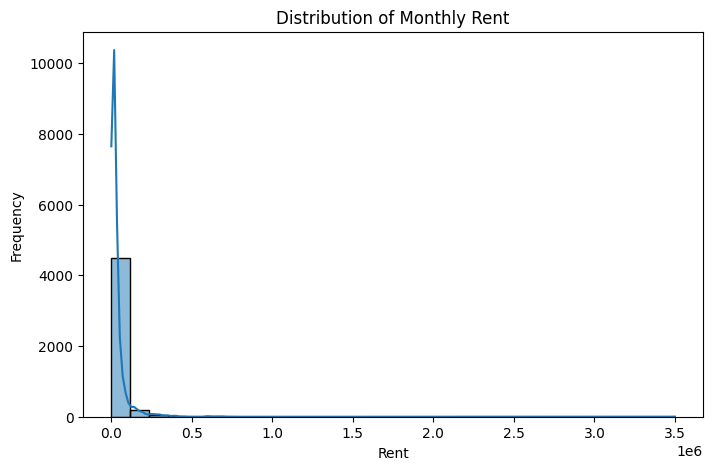

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Rent
plt.figure(figsize=(8,5))
sns.histplot(data['Rent'], bins=30, kde=True)
plt.title('Distribution of Monthly Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

The histogram effectively illustrates the distribution of monthly rent, highlighting the concentration of data points at lower rent amounts and the presence of outliers at higher rent amounts. This information can be useful for understanding the rental market and identifying potential trends or patterns.

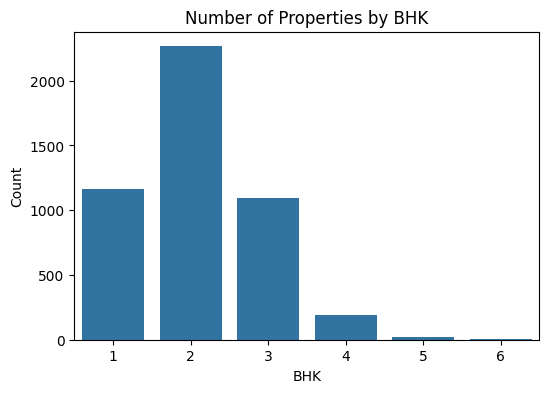

In [5]:
# 2. Count of Properties by BHK
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='BHK', order=sorted(data['BHK'].unique()))
plt.title('Number of Properties by BHK')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.show()

- 2 BHK properties have the highest count, exceeding 2000.
- 1 BHK and 3 BHK properties have a moderate count, around 1000.
- 4 BHK properties have a lower count, less than 500.
- 5 BHK and 6 BHK properties have a very low count, close to 0.


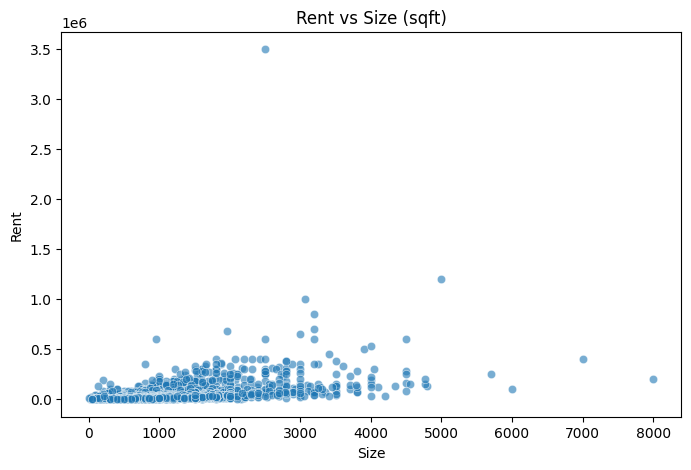

In [6]:
# 3. Rent vs Size (Scatter)
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Size', y='Rent', alpha=0.6)
plt.title('Rent vs Size (sqft)')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

- The majority of the data points are clustered between 0 and 4000 square feet on the x-axis.
- There is a positive correlation between rent and size, indicating that as the size of the property increases, the rent also tends to increase.
- However, there are some outliers where the rent is significantly higher than expected for a given size.

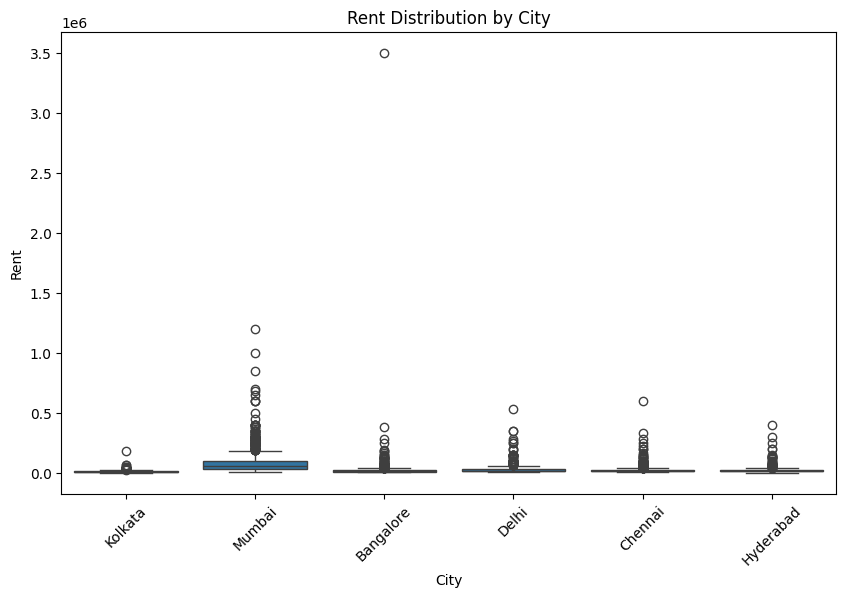

In [7]:
# 4. Boxplot: Rent by City
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='City', y='Rent')
plt.title('Rent Distribution by City')
plt.xlabel('City')
plt.ylabel('Rent')
plt.xticks(rotation=45)
plt.show()

- Mumbai's Rent Distribution: Mumbai has the highest median rent among all cities, with a significant number of outliers above 1.5.
- Outliers in Other Cities: Kolkata, Bangalore, Delhi, Chennai, and Hyderabad have fewer outliers compared to Mumbai.
- Rent Range: The rent range for all cities is between 0.0 and 3.5, with most cities having a median rent below 1.0.

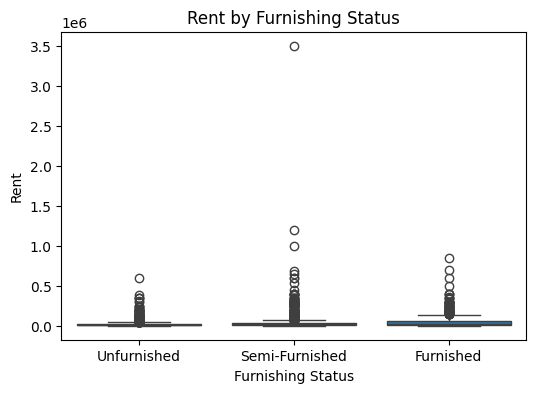

In [8]:
# 5. Boxplot: Rent by Furnishing Status
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Furnishing Status', y='Rent')
plt.title('Rent by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Rent')
plt.show()

- Furnished properties tend to have higher rents than semi-furnished and unfurnished properties.
- There are several outliers, indicatiing that some furnished properties have much higher rents than others.
  

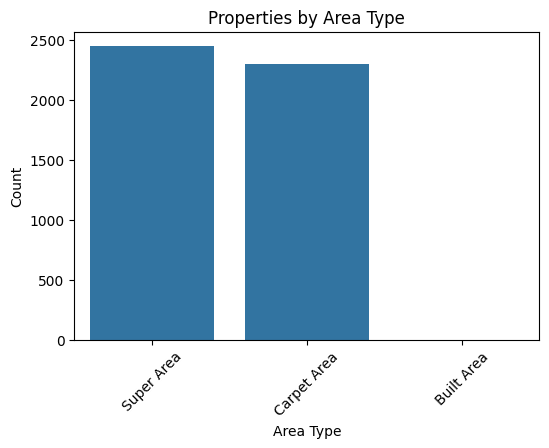

In [9]:
# 6. Countplot: Area Type
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Area Type', order=data['Area Type'].value_counts().index)
plt.title('Properties by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Super area and carpet Area are the dominant area types in the dataset.

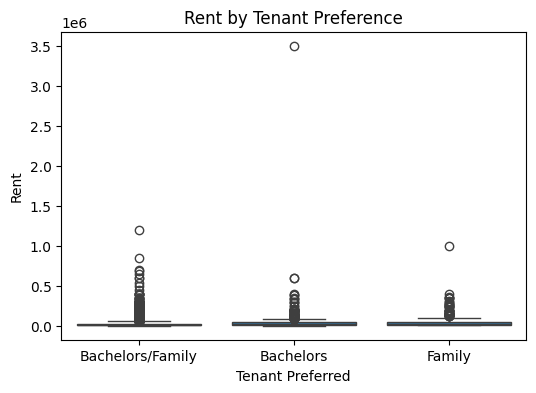

In [10]:
# 7. Boxplot: Rent by Tenant Preferred
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='Tenant Preferred', y='Rent')
plt.title('Rent by Tenant Preference')
plt.xlabel('Tenant Preferred')
plt.ylabel('Rent')
plt.show()

- There are outliers in all three categories, indicating that there are some rent values significantly higher than the rest in each category. The presence of outliers suggests variability in rent prices within each tenant preference group.
- Bachelors/Family: This category shows a range of rent values with several outliers, suggesting variability in what bachelors and families are willing to pay or are allocated.
- Bachelors Tenant Preferred: Similar to the Bachelors/Family category, there's variability with outliers present.
- Family: This category has the highest rent values, including an outlier significantly higher than the rest, indicating that families might be allocated or willing to pay higher rents.

In [16]:
X = data.drop("Rent", axis=1)
y = data["Rent"]

In [18]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multilinear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import numpy as np


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)

print("🔹 Multiple Linear Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_lr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Multiple Linear Regression
MAE: 23390.91479925384
MSE: 2145432663.961848
RMSE: 46318.81544212728
🔹 R² Score (Accuracy for Regression): 0.4616744313230252


# Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

MAE = mean_absolute_error(y_test, y_pred_poly)
MSE = mean_squared_error(y_test, y_pred_poly)
RMSE = np.sqrt(MSE)

print("\n🔸 Polynomial Regression (Degree=2)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)



🔸 Polynomial Regression (Degree=2)
MAE: 17746.270803158557
MSE: 1222038726.1239989
RMSE: 34957.67049052323


# SVR

In [22]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
RMSE = np.sqrt(MSE)

print("\n🔹 Support Vector Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_svr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Support Vector Regression
MAE: 24183.105523703623
MSE: 4314059574.464096
RMSE: 65681.50100647895
🔹 R² Score (Accuracy for Regression): -0.08247096855566038


# RandomForest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)

print("\n🔸 Random Forest Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rf)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔸 Random Forest Regression
MAE: 13259.493814035088
MSE: 1809847562.1809838
RMSE: 42542.30320728984
🔹 R² Score (Accuracy for Regression): 0.5458784447093511


# XGB Regressor

In [25]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_xgb)
MSE = mean_squared_error(y_test, y_pred_xgb)
RMSE = np.sqrt(MSE)

print("\n🔹 XGBoost Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_xgb)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 XGBoost Regression
MAE: 13871.052734375
MSE: 3992082176.0
RMSE: 63182.92630133555
🔹 R² Score (Accuracy for Regression): -0.0016813278198242188


In [26]:
import matplotlib.pyplot as plt

# Store error values for each model
model_names = ['Linear', 'Polynomial','SVR', 'Random Forest','XGBoost']

mae_values = [
    mean_absolute_error(y_test, y_pred_lr),      # Linear Regression
    mean_absolute_error(y_test, y_pred_poly),    # Polynomial Regression 
    mean_absolute_error(y_test, y_pred_svr),     # SVR
    mean_absolute_error(y_test, y_pred_rf),      # Random Forest
    mean_absolute_error(y_test, y_pred_xgb)      # XGBoost
]

mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_poly),
    mean_squared_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_xgb)
]

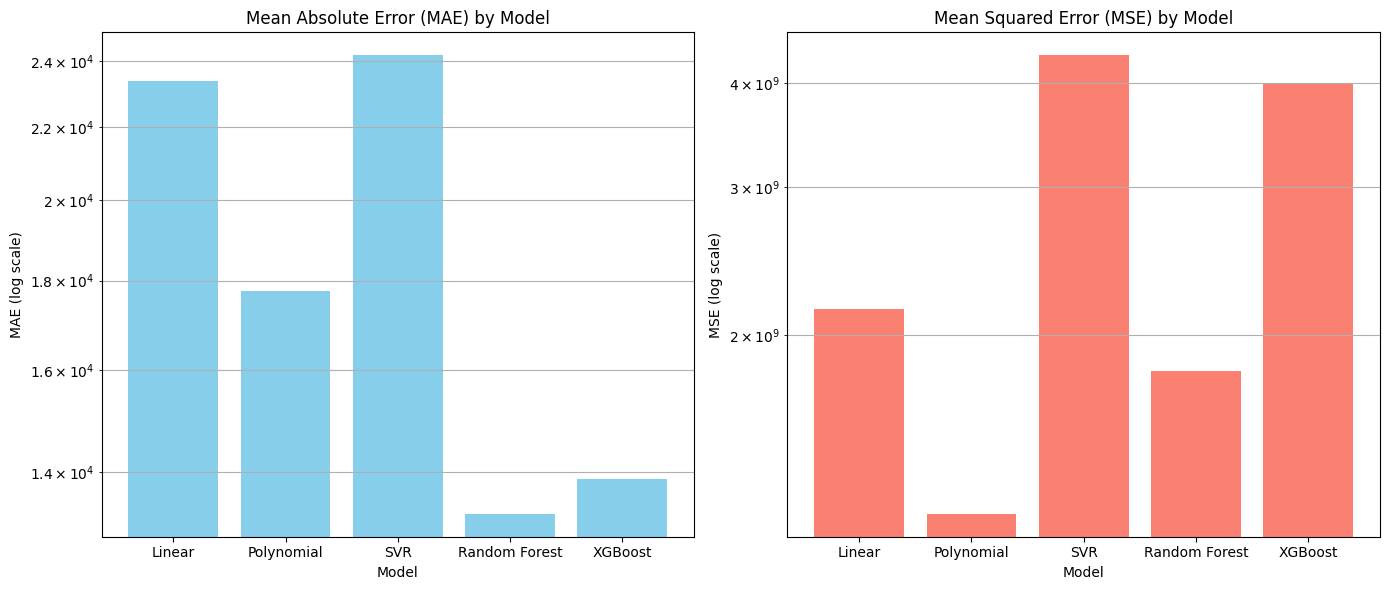

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MAE Plot (log scale)
axs[0].bar(model_names, mae_values, color='skyblue')
axs[0].set_title("Mean Absolute Error (MAE) by Model")
axs[0].set_ylabel("MAE (log scale)")
axs[0].set_xlabel("Model")
axs[0].set_yscale('log')  # ✅ log scale
axs[0].grid(axis='y', which='both')

# MSE Plot (log scale)
axs[1].bar(model_names, mse_values, color='salmon')
axs[1].set_title("Mean Squared Error (MSE) by Model")
axs[1].set_ylabel("MSE (log scale)")
axs[1].set_xlabel("Model")
axs[1].set_yscale('log')  # ✅ log scale
axs[1].grid(axis='y', which='both')

plt.tight_layout()
plt.show()


Overall, the graphs suggest that ensemble methods like XGBoost and Random Forest are more effective than traditional regression models like Linear and Polynomial for this house rent regression task. SVR also shows promising results, but its performance is not as strong as the ensemble methods.